In [315]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sb
sb.set()

In [332]:
Visibility_Range = np.linspace(0.1, 2, 50)
lambda1 = 5.5e-7
lambda2 = 830e-9
lambda3 = 0.3e-5
consta = 3.19
solution_1 = []
solution_2 = []
solution_3 = []
solution_4 = []

In [333]:
class OpticalFreeSpaceCommunication:
    
    def __init__(self, lambda_1, lambda_2, lambda_3, const, Visibility, solution_1, solution_2, solution_3, solution_4):
        self.lambda_1 = lambda_1
        self.lambda_2 = lambda_2
        self.lambda_3 = lambda_3
        self.const = const
        self.Visibility = Visibility
        self.solution_1 = []
        self.solution_2 = []
        self.solution_3 = []
        self.solution_4 = []
        
    def KruseModel(self):
        for i in range(len(self.Visibility)):
            if (self.Visibility[i] > 0 and self.Visibility[i] <= 6):
                q = 0.585*self.Visibility[i]**(1/3)
            elif (self.Visibility[i] > 6 and self.Visibility[i] <= 50):
                q = 1.3
            elif (self.Visibility[i] > 50):
                q = 1.6
                
            attenuation = (self.const*(self.lambda_1/self.lambda_2)**q)/self.Visibility[i]
            self.solution_1.append(attenuation)
        return self.solution_1
        
    def KimModel(self):
        for i in range(len(self.Visibility)):
            if(self.Visibility[i] < 0.5):
                q = 0
            elif(self.Visibility[i]>0.5 and self.Visibility[i]<=5):
                q = self.Visibility[i] - 0.5
            elif(self.Visibility[i]>1 and self.Visibility[i]<=6):
                q = 0.16*self.Visibility[i]+0.34
            elif(self.Visibility[i]>6 and self.Visibility[i]<=50):
                q = 1.3
            elif(self.Visibility[i]>50):
                q = 1.6
            
            attenuation = (self.const*(self.lambda_1/self.lambda_2)**q)/self.Visibility[i]
            self.solution_2.append(attenuation)
        return self.solution_2
            
        
    def Naboulsi(self, other):
        for i in range(len(other)):
            attenuation = 10*np.log((0.18126*self.lambda_2**2 + 0.13709*self.lambda_2 + 3.7205)/other[i])
            self.solution_3.append(attenuation)
        return self.solution_3
        
    def MachineLearningOptimization(self):
        for i in range(len(self.Visibility)):
            q = 0.5256*np.log(self.Visibility[i]) + 1.4323
            attenuation = (self.const*(self.lambda_1/self.lambda_3)**q)/self.Visibility[i]
            self.solution_4.append(attenuation)
        return self.solution_4

In [334]:
OpticalChannel =  OpticalFreeSpaceCommunication(lambda1, lambda2, lambda3, consta, Visibility_Range, solution_1, solution_2, solution_3,solution_4)

In [335]:
##OpticalChannel.Naboulsi(Visibility_Range)

# Combined Models

50

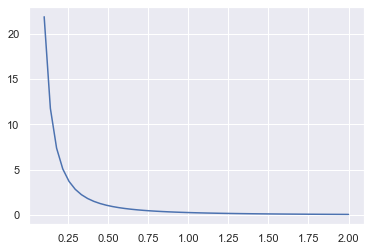

In [336]:
plt.plot(Visibility_Range, OpticalChannel.MachineLearningOptimization(), c="b")
len(OpticalChannel.Naboulsi(Visibiliy_Naboulsi))

Text(0.5, 1.0, 'Combined Model')

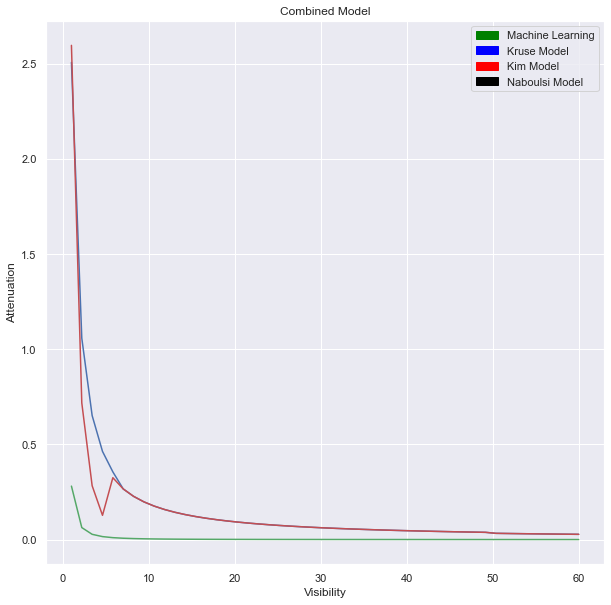

In [321]:
import matplotlib.patches as mpatches
plt.figure(figsize=(10,10))

green_patch = mpatches.Patch(color='green', label='Machine Learning')
#plt.legend(handles=[green_patch])

blue_patch = mpatches.Patch(color='blue', label='Kruse Model')
#plt.legend(handles=[blue_patch])

yellow_patch = mpatches.Patch(color='red', label='Kim Model')
#plt.legend(handles=[yellow_patch])

black_patch = mpatches.Patch(color='black', label='Naboulsi Model')
#plt.legend(handles=[yellow_patch])

plt.legend(handles=[green_patch, blue_patch, yellow_patch, black_patch])
plt.plot(Visibility_Range, OpticalChannel.KruseModel(), c="b")
plt.plot(Visibility_Range, OpticalChannel.KimModel(), c="r")
#plt.plot(Visibility_Range[:5], OpticalChannel.Naboulsi(Visibility_Range)[:5], c="k")
plt.plot(Visibility_Range, OpticalChannel.MachineLearningOptimization(), c="g")
plt.xlabel("Visibility")
plt.ylabel("Attenuation")
plt.title("Combined Model")

# Explanation

The above figure shows some free space models including Kruse, Kim, Naboulsi and machine learning simulation. Both models shows the behaviour of attenuation with visibility following an exponential decrease from the theoritical standpoint according to Mie theory. this behaviour is controlled by a non linear parameter that is prevalent to the metereological properties of locations and zones of interest called the particle size distribution of free space (q) and relating to weather and climate conditions. The blue line shows the variation in Kruse model which behaves differently at at q values with respect to visibility changes and shows a constant q value changes between 0 and 6km (q=1.3) and between 6 and 50km (q=1.6), while >50km q becomes a non function of visibility giving exponentially decreasing attenuation from about 25dB/km to less than 0.1db/km. The red line represent Kim model which is a slight modification of Kruse model in attempt to lower attenuation by controlling the parameter q breaking it into series of linear functions at some intervals and achieving a lower attenuation value at some visibility values less than 5km and lower attenuation at much lower visibility which explains a process that minimizes the margin of error in measuring attenuation. The black line represent the Naboulsi model which is independent of particle distribution of free space and largely depends on operating wavelength. the Naboulsi model captured a much higher attenuation at a lower visibility range but failed with visibility greater than 1km. Finally, the green line is a representation of machine learning optimization model model for a better explanatory effect of attenuation variation with visibility which explains how lower attenuation can be achieved at a much lower visibility range at a slightly higher wavelenght (3micro meter) compared to (830nano meter) of other models. The model also shows the trend of achieving exponentially decreasing attenuation at higher visibility to almost zero.